**Generate the Data**

In [4]:
import numpy as np
import pandas as pd

np.random.seed(1)

n = 1000  # total observations
p = 20    # number of features

# Generate predictors X ~ N(0,1)
X = np.random.normal(0, 1, size=(n, p))

# Create beta with some zeros
beta = np.array([5, 3, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

# Add noise
epsilon = np.random.normal(0, 1, size=n)

# Generate response
Y = X @ beta + epsilon

# Convert to DataFrame for convenience
data = pd.DataFrame(X, columns=[f'X{i+1}' for i in range(p)])
data['Y'] = Y


**Split into Training (100) and Test (900)**

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, train_size=100, random_state=1)

**Perform Best Subset Selection**

In [6]:
import itertools
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

def best_subset_selection(X, y, max_features=None):
    if max_features is None:
        max_features = X.shape[1]

    best_models = []
    for k in range(1, max_features + 1):
        best_mse = np.inf
        best_model = None
        for combo in itertools.combinations(X.columns, k):
            X_model = sm.add_constant(X[list(combo)])
            model = sm.OLS(y, X_model).fit()
            mse = mean_squared_error(y, model.fittedvalues)
            if mse < best_mse:
                best_mse = mse
                best_model = (combo, model)
        best_models.append(best_model)
    return best_models


**Plot Training and Test MSE for Best Models**

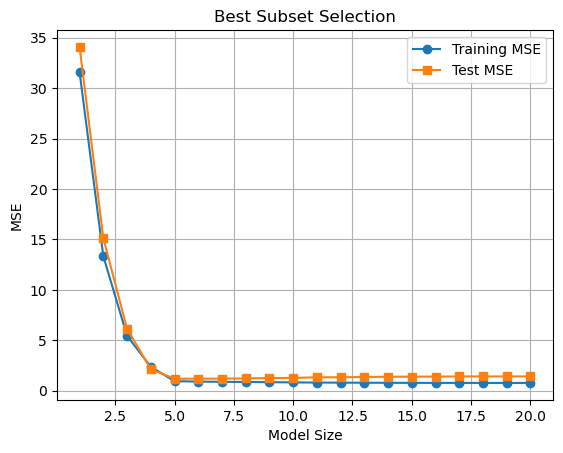

In [7]:
import matplotlib.pyplot as plt

X_train = train.drop(columns='Y')
y_train = train['Y']
X_test = test.drop(columns='Y')
y_test = test['Y']

best_models = best_subset_selection(X_train, y_train, max_features=20)

train_errors = []
test_errors = []

for combo, model in best_models:
    X_train_model = sm.add_constant(X_train[list(combo)])
    X_test_model = sm.add_constant(X_test[list(combo)])

    train_pred = model.predict(X_train_model)
    test_pred = model.predict(X_test_model)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

plt.plot(range(1, 21), train_errors, label='Training MSE', marker='o')
plt.plot(range(1, 21), test_errors, label='Test MSE', marker='s')
plt.xlabel('Model Size')
plt.ylabel('MSE')
plt.title('Best Subset Selection')
plt.legend()
plt.grid(True)
plt.show()


**Identify the Optimal Model Size**

In [8]:
optimal_size = np.argmin(test_errors) + 1  # +1 because Python indexing starts at 0
min_test_mse = test_errors[optimal_size - 1]

print(f"Test MSE is minimized at model size: {optimal_size}")
print(f"Minimum Test MSE: {min_test_mse:.4f}")


Test MSE is minimized at model size: 5
Minimum Test MSE: 1.1902
